# Heat Map Examples

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
DIR = "/workspace/nflbigdatabowl2023"
sys.path.append(DIR)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from shapely import Point as ShapelyPoint
from shapely import Polygon as ShapelyPolygon
from matplotlib.patches import Polygon as PolygonPatch

from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
def vertices_from_shape(shape):
    return list(shape.exterior.coords)

In [5]:
example_shapes = [
    ShapelyPolygon([(0, 0), (0, 1), (1, 1), (1, 0)]),
    ShapelyPolygon([(0, 0), (0, 2), (2, 2), (2, 0)]),
    ShapelyPolygon([(1, 1), (1, 2), (2, 2), (2, 1)]),
]

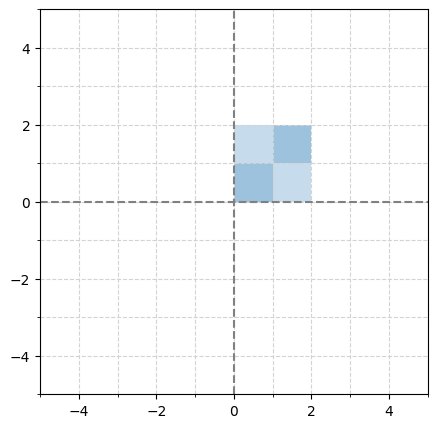

In [6]:
fig, ax = plt.subplots(1, 1)

for shape in example_shapes:
    vertices = vertices_from_shape(shape)
    patch = PolygonPatch(vertices, alpha=0.25)
    ax.add_patch(patch)
    
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.axhline(0, linestyle="--", color="gray")
ax.axvline(0, linestyle="--", color="gray")
ax.grid(which="both", linestyle="--", color="lightgray")
fig.set_size_inches(5, 5)
plt.show()

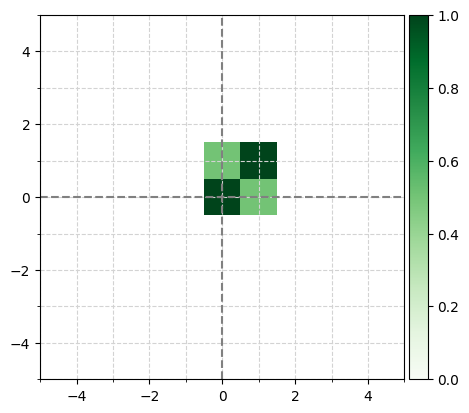

In [28]:
"""
[
     # each column has the same x coord
    [(x=0, y=0), (x=1, y=0)], # each row has the same y coord
    [(x=0, y=1), (x=1, y=1)],
]
"""

heatmap = [
    [1.0, 0.5],
    [0.5, 1.0],
]

fig, ax = plt.subplots(1, 1)

im = ax.imshow(heatmap, cmap="Greens", vmin=0, vmax=1)

# Colorbar on ax code based on : https://stackoverflow.com/a/49037495
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im, cax=cax, orientation="vertical")

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.axhline(0, linestyle="--", color="gray")
ax.axvline(0, linestyle="--", color="gray")
ax.grid(which="both", linestyle="--", color="lightgray")
fig.set_size_inches(5, 5)
plt.show()

In [33]:
def heatmap_from_points(points, bin_size):
    x = [p[0] for p in points]
    y = [p[1] for p in points]

    # Heatmap binning logic based on: https://stackoverflow.com/a/61632120
    heatmap, xedges, yedges = np.histogram2d(
        x,
        y,
        bins=[
            np.arange(min(x), max(x) + (2 * bin_size), bin_size),
            np.arange(min(y), max(y) + (2 * bin_size), bin_size),
        ],
        # Density = bin_count / total_count / bin_area
        # Should we divide by bin area? If the results look wrong,
        # then we can just do bin_count / total_count ourselves.
        density=True,
    )

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    shifted_extent = np.array(extent) - (bin_size / 2)
    return heatmap, shifted_extent

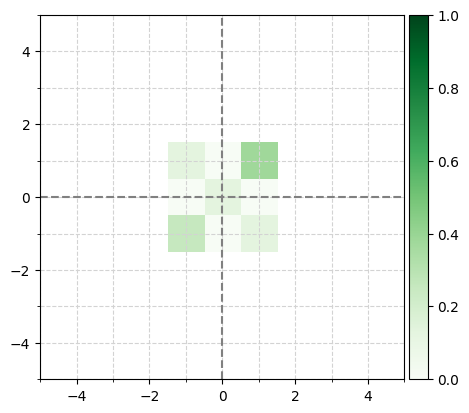

In [34]:
fig, ax = plt.subplots(1, 1)

data = [
    # Format: (x, y)
    (-1, -1),
    (-1, -1),
    (1, -1),
    (-1, 1),
    (1, 1),
    (1, 1),
    (1, 1),
    (0.5, 0.5),
]
heatmap, shifted_extent = heatmap_from_points(data, bin_size=1)

im = ax.imshow(heatmap, extent=shifted_extent, cmap="Greens", vmin=0, vmax=1, origin="lower")

# Colorbar on ax code based on : https://stackoverflow.com/a/49037495
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im, cax=cax, orientation="vertical")

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.axhline(0, linestyle="--", color="gray")
ax.axvline(0, linestyle="--", color="gray")
ax.grid(which="both", linestyle="--", color="lightgray")
fig.set_size_inches(5, 5)
plt.show()

In [35]:
def sample_points_in_shapes(shapes, bin_start, bin_end, bin_size):
    sample_range = np.arange(bin_start, bin_end + (2 * bin_size), bin_size)
    points_in_pocket = []
    # This triple for-loop is inefficient, optimize with vector operations.
    for x in sample_range:
        for y in sample_range:
            for shape in shapes:
                point = ShapelyPoint(x, y)
                if shape.contains(point):
                    points_in_pocket.append((x, y))
    return points_in_pocket

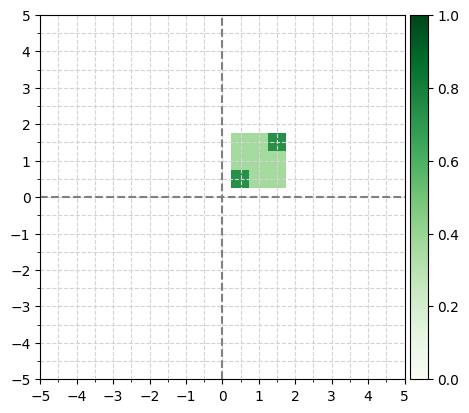

In [39]:
fig, ax = plt.subplots(1, 1)

bin_size = 0.5
points = sample_points_in_shapes(
    example_shapes,
    bin_start=-1,
    bin_end=3,
    bin_size=bin_size,
)
heatmap, shifted_extent = heatmap_from_points(points, bin_size)

im = ax.imshow(heatmap, extent=shifted_extent, cmap="Greens", vmin=0, vmax=1, origin="lower")

# Colorbar on ax code based on : https://stackoverflow.com/a/49037495
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im, cax=cax, orientation="vertical")

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.xaxis.set_major_locator(MultipleLocator(2 * bin_size))
ax.yaxis.set_major_locator(MultipleLocator(2 * bin_size))
ax.xaxis.set_minor_locator(MultipleLocator(bin_size))
ax.yaxis.set_minor_locator(MultipleLocator(bin_size))
ax.axhline(0, linestyle="--", color="gray")
ax.axvline(0, linestyle="--", color="gray")
ax.grid(which="both", linestyle="--", color="lightgray")
fig.set_size_inches(5, 5)
plt.show()